PA2 Notebook 2: Analysis
===

This is the second notebook for DRWI Pollution Assessment Stage 2 (PA2) analysis.

It reads dataframes prepared in Notebook 1 and calculates Pollution Assessment metrics necessary for the Stage 2 Assessment.

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [1]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd

In [2]:
# Confirm GeoPandas >= 0.11, for full GeoParquet support
print("Geopandas: ", gpd.__version__)

Geopandas:  0.13.2


In [3]:
# Confirm that this repo is in your Python Path
!conda-develop /Users/aaufdenkampe/Documents/Python/pollution-assessment/src

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/bin/conda-develop:11: DeprecationWarning: conda_build.cli.main_develop.main is deprecated and will be removed in 4.0.0. Use `conda develop` instead.
  sys.exit(main())
path exists, skipping /Users/aaufdenkampe/Documents/Python/pollution-assessment/src
completed operation for: /Users/aaufdenkampe/Documents/Python/pollution-assessment/src


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
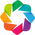

In [4]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

In [5]:
pa.__version__

'0.1.0'

## Set Paths


In [6]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [7]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'

In [8]:
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

## Open Files from Notebook 1

In [9]:
%%time
# read geometry data from GeoParquet files
reach_gdf = gpd.read_parquet(geography_path /'reach_gdf.parquet')
catch_gdf = gpd.read_parquet(geography_path /'catch_gdf.parquet')

huc12_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc10_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc08_outlets_drwi_gdf.parquet')


CPU times: user 939 ms, sys: 278 ms, total: 1.22 s
Wall time: 1.22 s


In [10]:
%%time
# Read WikiSRAT results data from Parquet files
reach_concs_df = pd.read_parquet(data_output_path /'reach_concs_df.parquet')
catch_loads_df = pd.read_parquet(data_output_path /'catch_loads_df.parquet')

CPU times: user 149 ms, sys: 50.9 ms, total: 200 ms
Wall time: 68.2 ms


## Open Files from FieldDOC
(Possibly remove and wait for Notebook 6)

In [11]:
# # Practices
# rest_gdf = gpd.read_parquet(project_path / 'stage2/private/restoration_bmps_from_FieldDoc.parquet')
# prot_gdf = gpd.read_parquet(project_path / 'stage2/private/protection_bmps_from_FieldDoc.parquet')

# # Practices by COMID
# rest_comid_gdf = gpd.read_parquet(project_path / 'stage2/private/restoration_df.parquet')
# prot_comid_gdf = gpd.read_parquet(project_path / 'stage2/private/protection_df.parquet')

# Baseline Results
Create mappable GeoDataFrames (GDF) of results for "baseline" model runs (i.e. 'No restoration or protection')

In [12]:
# Use pollutant names dictionary
pa.calc.pollutants

{'TotalN': 'tn', 'TotalP': 'tp', 'Sediment': 'tss'}

In [13]:
# Create Stream Reach Concentrations GDF
reach_concs_gdf = pa.calc.join_results(
    'reach', reach_gdf, reach_concs_df, 
    pa.calc.run_groups[0], run_type='combined', ps=False
)
# Add columns with previously used short names
for pollutant in pa.calc.pollutants.keys():
    reach_concs_gdf[f'{pa.calc.pollutants[pollutant]}_conc'] = (
        reach_concs_gdf[f'{pollutant}'])

In [14]:
reach_concs_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   watershed_hectares  19496 non-null  float64 
 1   maflowv             19496 non-null  float64 
 2   geometry            19494 non-null  geometry
 3   cluster             17358 non-null  category
 4   sub_focusarea       186 non-null    Int64   
 5   nord                18870 non-null  Int64   
 6   nordstop            18844 non-null  Int64   
 7   huc12               19496 non-null  category
 8   streamorder         19496 non-null  int64   
 9   headwater           19496 non-null  int64   
 10  phase               4082 non-null   category
 11  fa_name             4082 non-null   category
 12  in_drb              19496 non-null  boolean 
 13  huc08               19496 non-null  category
 14  huc10               19496 non-null  category
 15  into_dr             194

In [15]:
# Create Catchment Loads GDF
catch_loads_gdf = pa.calc.join_results(
    'catch', catch_gdf, catch_loads_df, 
    pa.calc.run_groups[0], run_type='combined', ps=False
)
# Add columns with previously used short names
for pollutant in pa.calc.pollutants.keys():
    catch_loads_gdf[f'{pa.calc.pollutants[pollutant]}_load'] = (
        catch_loads_gdf[f'{pollutant}'])

# Add columns with loading rates (kg/ha/y)
pa.calc.add_loadrate(catch_loads_gdf)

catch_loads_gdf.head()

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,run_group,run_type,funding_sources,with_attenuation,tn_load,tp_load,tss_load,tn_loadrate,tp_loadrate,tss_loadrate
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,"MULTIPOLYGON (((-8301340.781 5199034.787, -830...",drb,<NA>,74914,74914,020401020302,1,1,...,No restoration or protection,combined,NaN,True,12680.544786,1189.608231,1.101612e+06,1.951842,0.183109,169.564734
1748537,1663.1712,1664.46,"MULTIPOLYGON (((-8304909.314 5200051.727, -830...",drb,<NA>,74913,74913,020401020302,1,1,...,No restoration or protection,combined,NaN,True,3771.332143,363.366436,2.013339e+05,2.267555,0.218478,121.054237
1748539,1639.4128,1640.70,"MULTIPOLYGON (((-8315191.630 5191704.467, -831...",drb,<NA>,74921,74921,020401020305,1,1,...,No restoration or protection,combined,NaN,True,3133.430355,357.227990,2.514024e+05,1.911313,0.217900,153.349047
1748541,3013.8348,12912.30,"MULTIPOLYGON (((-8309824.403 5193427.492, -830...",drb,<NA>,74911,74915,020401020302,2,0,...,No restoration or protection,combined,NaN,True,6409.514442,668.969079,6.177144e+05,2.126697,0.221966,204.959595
1748543,1151.0990,5232.87,"MULTIPOLYGON (((-8312514.529 5185023.831, -831...",drb,<NA>,74920,74922,020401020305,2,0,...,No restoration or protection,combined,NaN,True,2918.236825,317.461447,1.989546e+05,2.535174,0.275790,172.838845


In [16]:
catch_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   geometry            19496 non-null  geometry
 3   cluster             17358 non-null  category
 4   sub_focusarea       186 non-null    Int64   
 5   nord                18870 non-null  Int64   
 6   nordstop            18844 non-null  Int64   
 7   huc12               19496 non-null  category
 8   streamorder         19496 non-null  int64   
 9   headwater           19496 non-null  int64   
 10  phase               4082 non-null   category
 11  fa_name             4082 non-null   category
 12  in_drb              19496 non-null  boolean 
 13  huc08               19496 non-null  category
 14  huc10               19496 non-null  category
 15  Source              194

# XS: Excess Pollution Results

```
excess pollution = total pollution 
                   – threshold pollution target
```

In [17]:
# Open dictionary of Target Values
pa.calc.targets

{'tn': {'loadrate_target': 17.07, 'conc_target': 4.73},
 'tp': {'loadrate_target': 0.31, 'conc_target': 0.09},
 'tss': {'loadrate_target': 923.8, 'conc_target': 237.3}}

In [18]:
pa.calc.add_excess('reach', reach_concs_gdf)
reach_concs_gdf.head(3)

,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,run_group,run_type,funding_sources,with_attenuation,tn_conc,tp_conc,tss_conc,tn_conc_xs,tp_conc_xs,tss_conc_xs
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,1,...,No restoration or protection,combined,NaN,True,0.324727,0.030464,28.210388,-4.405273,-0.059536,-209.089612
1748537,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,1,...,No restoration or protection,combined,NaN,True,0.377186,0.036342,20.136201,-4.352814,-0.053658,-217.163799
1748539,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,1,...,No restoration or protection,combined,NaN,True,0.312437,0.035620,25.067574,-4.417563,-0.054380,-212.232426


In [19]:
pa.calc.add_excess('catch', catch_loads_gdf)
catch_loads_gdf.head(3)

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,with_attenuation,tn_load,tp_load,tss_load,tn_loadrate,tp_loadrate,tss_loadrate,tn_loadrate_xs,tp_loadrate_xs,tss_loadrate_xs
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,"MULTIPOLYGON (((-8301340.781 5199034.787, -830...",drb,<NA>,74914,74914,020401020302,1,1,...,True,12680.544786,1189.608231,1.101612e+06,1.951842,0.183109,169.564734,-15.118158,-0.126891,-754.235266
1748537,1663.1712,1664.46,"MULTIPOLYGON (((-8304909.314 5200051.727, -830...",drb,<NA>,74913,74913,020401020302,1,1,...,True,3771.332143,363.366436,2.013339e+05,2.267555,0.218478,121.054237,-14.802445,-0.091522,-802.745763
1748539,1639.4128,1640.70,"MULTIPOLYGON (((-8315191.630 5191704.467, -831...",drb,<NA>,74921,74921,020401020305,1,1,...,True,3133.430355,357.227990,2.514024e+05,1.911313,0.217900,153.349047,-15.158687,-0.092100,-770.450953


# PS: Point Source Results

In [20]:
reach_concs_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   watershed_hectares  19496 non-null  float64 
 1   maflowv             19496 non-null  float64 
 2   geometry            19494 non-null  geometry
 3   cluster             17358 non-null  category
 4   sub_focusarea       186 non-null    Int64   
 5   nord                18870 non-null  Int64   
 6   nordstop            18844 non-null  Int64   
 7   huc12               19496 non-null  category
 8   streamorder         19496 non-null  int64   
 9   headwater           19496 non-null  int64   
 10  phase               4082 non-null   category
 11  fa_name             4082 non-null   category
 12  in_drb              19496 non-null  boolean 
 13  huc08               19496 non-null  category
 14  huc10               19496 non-null  category
 15  into_dr             194

In [21]:
reload(pa.calc)

<module 'pollution_assessment.calc' from '/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/calc.py'>

In [22]:
pa.calc.add_ps('reach', reach_concs_gdf, reach_concs_df, run_type='combined')
reach_concs_gdf

,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,with_attenuation,tn_conc,tp_conc,tss_conc,tn_conc_xs,tp_conc_xs,tss_conc_xs,tn_conc_ps,tp_conc_ps,tss_conc_ps
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,1,...,True,0.324727,0.030464,28.210388,-4.405273,-0.059536,-209.089612,0.0,0.0,0.0
1748537,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,1,...,True,0.377186,0.036342,20.136201,-4.352814,-0.053658,-217.163799,0.0,0.0,0.0
1748539,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,1,...,True,0.312437,0.035620,25.067574,-4.417563,-0.054380,-212.232426,0.0,0.0,0.0
1748541,12912.30,86.528,MULTILINESTRING Z ((-8304282.841 5198049.613 0...,drb,<NA>,74911,74915,020401020302,2,0,...,True,0.331619,0.032349,28.740814,-4.398381,-0.057651,-208.559186,0.0,0.0,0.0
1748543,5232.87,35.389,MULTILINESTRING Z ((-8312991.936 5192442.779 0...,drb,<NA>,74920,74922,020401020305,2,0,...,True,0.302415,0.031977,21.590414,-4.427585,-0.058023,-215.709586,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040366,2720941.47,17802.923,MULTILINESTRING Z ((-8400739.070 4831969.993 0...,drb,<NA>,65070,76964,020402060103,7,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932040367,2717821.26,17788.281,MULTILINESTRING Z ((-8399585.343 4833380.786 0...,drb,<NA>,65079,76964,020402060103,7,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932040368,2716120.08,17780.448,MULTILINESTRING Z ((-8398343.469 4834781.918 0...,drb,<NA>,65080,76960,020402060103,7,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
reach_concs_gdf.run_type.value_counts()

run_type
combined    11529
single       7967
Name: count, dtype: int64

In [24]:
pa.calc.add_ps('catch', catch_loads_gdf, catch_loads_df, run_type='combined')
catch_loads_gdf.head(3)

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tn_loadrate,tp_loadrate,tss_loadrate,tn_loadrate_xs,tp_loadrate_xs,tss_loadrate_xs,tn_loadrate_ps,tp_loadrate_ps,tss_loadrate_ps,tss_loadrate_xsnps
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,"MULTIPOLYGON (((-8301340.781 5199034.787, -830...",drb,<NA>,74914,74914,020401020302,1,1,...,1.951842,0.183109,169.564734,-15.118158,-0.126891,-754.235266,0.0,0.0,NaN,-754.235266
1748537,1663.1712,1664.46,"MULTIPOLYGON (((-8304909.314 5200051.727, -830...",drb,<NA>,74913,74913,020401020302,1,1,...,2.267555,0.218478,121.054237,-14.802445,-0.091522,-802.745763,0.0,0.0,NaN,-802.745763
1748539,1639.4128,1640.70,"MULTIPOLYGON (((-8315191.630 5191704.467, -831...",drb,<NA>,74921,74921,020401020305,1,1,...,1.911313,0.217900,153.349047,-15.158687,-0.092100,-770.450953,0.0,0.0,NaN,-770.450953


# XSNPS: Excess Non-Point Source Results

```
excess nonpoint source pollution = excess pollution 
                                   – point source pollution
```

In [25]:
pa.calc.add_xsnps('reach', reach_concs_gdf, reach_concs_df, run_type='combined')
reach_concs_gdf.head(3)

,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tss_conc,tn_conc_xs,tp_conc_xs,tss_conc_xs,tn_conc_ps,tp_conc_ps,tss_conc_ps,tn_conc_xsnps,tp_conc_xsnps,tss_conc_xsnps
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,1,...,28.210388,-4.405273,-0.059536,-209.089612,0.0,0.0,0.0,-4.405273,-0.059536,-209.089612
1748537,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,1,...,20.136201,-4.352814,-0.053658,-217.163799,0.0,0.0,0.0,-4.352814,-0.053658,-217.163799
1748539,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,1,...,25.067574,-4.417563,-0.054380,-212.232426,0.0,0.0,0.0,-4.417563,-0.054380,-212.232426


In [26]:
pa.calc.add_xsnps('catch', catch_loads_gdf, catch_loads_df, run_type='combined')
catch_loads_gdf.head(3)

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tss_loadrate,tn_loadrate_xs,tp_loadrate_xs,tss_loadrate_xs,tn_loadrate_ps,tp_loadrate_ps,tss_loadrate_ps,tss_loadrate_xsnps,tn_loadrate_xsnps,tp_loadrate_xsnps
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,"MULTIPOLYGON (((-8301340.781 5199034.787, -830...",drb,<NA>,74914,74914,020401020302,1,1,...,169.564734,-15.118158,-0.126891,-754.235266,0.0,0.0,NaN,-754.235266,-15.118158,-0.126891
1748537,1663.1712,1664.46,"MULTIPOLYGON (((-8304909.314 5200051.727, -830...",drb,<NA>,74913,74913,020401020302,1,1,...,121.054237,-14.802445,-0.091522,-802.745763,0.0,0.0,NaN,-802.745763,-14.802445,-0.091522
1748539,1639.4128,1640.70,"MULTIPOLYGON (((-8315191.630 5191704.467, -831...",drb,<NA>,74921,74921,020401020305,1,1,...,153.349047,-15.158687,-0.092100,-770.450953,0.0,0.0,NaN,-770.450953,-15.158687,-0.092100


## Confirm Results vs. MMW Sub-basin

Confirm values make sense for COMIDs with:
- no point sources: `4648450`
- large point sources: `932040160`

In [27]:
reach_concs_gdf[['tp_conc',
                'tp_conc_ps',
                'tp_conc_xs',
                'tp_conc_xsnps',
               ]].loc[[4648450, 932040160]]

,tp_conc,tp_conc_ps,tp_conc_xs,tp_conc_xsnps
comid,,,,
4648450,0.324502,0.000000,0.234502,0.234502
932040160,0.284033,0.086628,0.194033,0.107405


In [28]:
catch_loads_gdf[['tp_loadrate',
                'tp_loadrate_xs',
                'tp_loadrate_xsnps',
               ]].loc[[4648450, 932040160]]

,tp_loadrate,tp_loadrate_xs,tp_loadrate_xsnps
comid,,,
4648450,1.554258,1.244258,1.244258
932040160,7.054176,6.744176,0.187592


In [29]:
catch_loads_gdf[['tn_loadrate',
                'tn_loadrate_ps',
                'tn_loadrate_xs',
                'tn_loadrate_xsnps',
               ]].loc[[4648450, 932040160]]

,tn_loadrate,tn_loadrate_ps,tn_loadrate_xs,tn_loadrate_xsnps
comid,,,,
4648450,25.356569,0.000000,8.286569,8.286569
932040160,49.770205,40.932734,32.700205,-8.232529


In [30]:
# confirm point source
df = pa.calc.calc_loadrate(
    catch_loads_gdf, catch_loads_df, 'TotalN', 
    pa.calc.run_groups[0], run_type='combined', ps=True
)
df.loc[[4648450, 932040160]]

comid
4648450       0.000000
932040160    40.932734
dtype: float64

# REM: Remaining XSNPS after Restoration

In [31]:
for group_key in [1,2,3]:
    pa.calc.add_remaining('reach', reach_concs_gdf, reach_concs_df, group_key, run_type='combined')
reach_concs_gdf.loc[[4648450, 932040160]]

,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tss_conc_xsnps,tn_conc_rem1,tp_conc_rem1,tss_conc_rem1,tn_conc_rem2,tp_conc_rem2,tss_conc_rem2,tn_conc_rem3,tp_conc_rem3,tss_conc_rem3
comid,,,,,,,,,,,,,,,,,,,,,
4648450,263.61,1.412,MULTILINESTRING Z ((-8449613.219 4882948.059 0...,Brandywine and Christina,<NA>,64639,64639,020402050202,1,1,...,-86.572683,0.249977,0.156533,-98.222925,0.249977,0.156533,-98.222925,0.248132,0.155055,-98.452040
932040160,14124.96,74.903,MULTILINESTRING Z ((-8440707.897 4862261.408 0...,Brandywine and Christina,<NA>,64609,64658,020402050202,3,0,...,-96.816710,-0.607268,0.082555,-150.177255,-0.607268,0.082555,-150.177255,-0.613917,0.076873,-150.473741


In [32]:
for group_key in [1,2,3]:
    pa.calc.add_remaining('catch', catch_loads_gdf, catch_loads_df, group_key)
catch_loads_gdf.loc[[4648450, 932040160]]

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tp_loadrate_xsnps,tn_loadrate_rem1,tp_loadrate_rem1,tss_loadrate_rem1,tn_loadrate_rem2,tp_loadrate_rem2,tss_loadrate_rem2,tn_loadrate_rem3,tp_loadrate_rem3,tss_loadrate_rem3
comid,,,,,,,,,,,,,,,,,,,,,
4648450,263.4373,263.61,"MULTIPOLYGON (((-8449229.677 4880762.406, -844...",Brandywine and Christina,<NA>,64639,64639,020402050202,1,1,...,1.244258,6.782443,0.870812,-257.666738,6.782443,0.870812,-257.666738,6.773609,0.863734,-258.764124
932040160,497.8113,14124.96,"MULTIPOLYGON (((-8442711.700 4860467.546, -844...",Brandywine and Christina,<NA>,64609,64658,020402050202,3,0,...,0.187592,-8.232529,0.187592,162.418203,-8.232529,0.187592,162.418203,-8.242159,0.177068,162.269713


# AVOID: Avoided Loads due to Protection

In [33]:
pa.calc.run_groups[4]

'Direct WPF Protection'

In [34]:
pa.calc.add_avoided('reach', reach_concs_gdf, reach_concs_df, 4, run_type='combined')
reach_concs_gdf.loc[pa.calc.comid_test_dict.keys(),
    ['tp_conc', 'tp_conc_xsnps','tp_conc_rem3', 'tp_conc_avoid']]

,tp_conc,tp_conc_xsnps,tp_conc_rem3,tp_conc_avoid
comid,,,,
4648450,0.324502,0.234502,0.155055,0.000000
4648684,0.614707,0.152823,0.150100,0.000000
932040160,0.284033,0.107405,0.076873,0.000000
2583195,0.064066,-0.025934,-0.025937,0.054172
932040230,0.006167,-0.083833,-0.083833,0.015771
2619256,0.009448,-0.080902,-0.080953,0.000000


In [35]:
pa.calc.add_avoided('catch', catch_loads_gdf, catch_loads_df, 4, run_type='combined')
catch_loads_gdf.loc[pa.calc.comid_test_dict.keys(),
    ['tp_loadrate', 'tp_loadrate_xsnps','tp_loadrate_rem3', 'tp_loadrate_avoid']]

,tp_loadrate,tp_loadrate_xsnps,tp_loadrate_rem3,tp_loadrate_avoid
comid,,,,
4648450,1.554258,1.244258,0.863734,0.000000
4648684,5.058250,0.877691,0.868742,0.000000
932040160,7.054176,0.187592,0.177068,0.000000
2583195,0.359205,0.049205,0.049190,0.303731
932040230,0.082214,-0.227786,-0.227786,0.216275
2619256,0.158917,-0.151083,-0.151098,0.000000


In [36]:
catch_loads_gdf.loc[(catch_loads_gdf.tp_loadrate_avoid > 0)]

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tss_loadrate_rem1,tn_loadrate_rem2,tp_loadrate_rem2,tss_loadrate_rem2,tn_loadrate_rem3,tp_loadrate_rem3,tss_loadrate_rem3,tn_loadrate_avoid,tp_loadrate_avoid,tss_loadrate_avoid
comid,,,,,,,,,,,,,,,,,,,,,
2583191,277.9706,356.76,"MULTIPOLYGON (((-8321373.063 5036691.907, -832...",New Jersey Highlands,<NA>,70084,70085,020401050101,1,1,...,-645.705971,-14.543512,-0.070038,-645.705971,-14.543590,-0.070051,-645.712933,0.001428,0.012961,0.539511
2583195,244.9663,245.16,"MULTIPOLYGON (((-8322884.353 5034593.476, -832...",New Jersey Highlands,<NA>,70082,70082,020401050101,1,1,...,-492.602728,-13.993447,0.049205,-492.602728,-13.993536,0.049190,-492.610898,0.033450,0.303731,12.640769
2583199,215.1096,1018.44,"MULTIPOLYGON (((-8325931.539 5035114.436, -832...",New Jersey Highlands,<NA>,70074,70080,020401050101,2,0,...,-444.071676,-15.198850,-0.088779,-444.071676,-15.199058,-0.088814,-444.090349,0.015249,0.137018,5.734300
2583463,163.6690,163.80,"MULTIPOLYGON (((-8348195.342 5014278.655, -834...",New Jersey Highlands,<NA>,70175,70175,020401050104,1,1,...,-733.990121,-16.267772,-0.227914,-733.990121,-16.267783,-0.227920,-733.990469,0.002733,0.024870,1.135799
2583501,343.6150,1712.34,"MULTIPOLYGON (((-8349076.358 5012570.234, -834...",New Jersey Highlands,<NA>,70168,70175,020401050104,2,0,...,-762.747681,-16.007439,-0.221786,-762.747681,-16.007477,-0.221813,-762.748481,0.004765,0.043350,1.979877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040255,76.5288,2988.72,"MULTIPOLYGON (((-8358153.033 5048788.699, -835...",Poconos and Kittatinny,4,70847,70860,020401040602,2,0,...,-852.928627,-16.710960,-0.278467,-852.928627,-16.710960,-0.278467,-852.928627,0.022960,0.195906,9.870424
932040257,3.9570,3413.34,"MULTIPOLYGON (((-8399647.420 5049584.922, -839...",Upper Lehigh,<NA>,76203,76227,020401060201,3,0,...,-733.829159,-10.827665,-0.111938,-733.829159,-10.827665,-0.111938,-733.829159,0.005598,0.042961,2.053524
932040258,68.8874,459.27,"MULTIPOLYGON (((-8400132.510 5050177.661, -840...",Upper Lehigh,<NA>,76230,76232,020401060201,1,0,...,-609.432109,-12.958088,-0.091048,-609.432109,-12.958105,-0.091050,-609.433596,0.001465,0.012993,0.573357


# Confirm Results

In [37]:
pa.calc.comid_test_dict

{4648450: 'no point sources',
 4648684: 'Upper E Branch Brandywine',
 932040160: 'large point sources',
 2583195: 'protection projects',
 932040230: 'restoration and protection projects',
 2619256: "where run_type='combined' gives a value when 'single' does not"}

In [38]:
catch_loads_gdf[['tp_loadrate',
                'tp_loadrate_xs',
                'tp_loadrate_xsnps',
                'tp_loadrate_rem1',
                'tp_loadrate_rem2',
                'tp_loadrate_rem3',
                'tp_loadrate_avoid',
               ]].loc[pa.calc.comid_test_dict.keys()]

,tp_loadrate,tp_loadrate_xs,tp_loadrate_xsnps,tp_loadrate_rem1,tp_loadrate_rem2,tp_loadrate_rem3,tp_loadrate_avoid
comid,,,,,,,
4648450,1.554258,1.244258,1.244258,0.870812,0.870812,0.863734,0.000000
4648684,5.058250,4.748250,0.877691,0.875928,0.875928,0.868742,0.000000
932040160,7.054176,6.744176,0.187592,0.187592,0.187592,0.177068,0.000000
2583195,0.359205,0.049205,0.049205,0.049205,0.049205,0.049190,0.303731
932040230,0.082214,-0.227786,-0.227786,-0.227786,-0.227786,-0.227786,0.216275
2619256,0.158917,-0.151083,-0.151083,-0.151083,-0.151083,-0.151098,0.000000


In [39]:
catch_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   geometry            19496 non-null  geometry
 3   cluster             17358 non-null  category
 4   sub_focusarea       186 non-null    Int64   
 5   nord                18870 non-null  Int64   
 6   nordstop            18844 non-null  Int64   
 7   huc12               19496 non-null  category
 8   streamorder         19496 non-null  int64   
 9   headwater           19496 non-null  int64   
 10  phase               4082 non-null   category
 11  fa_name             4082 non-null   category
 12  in_drb              19496 non-null  boolean 
 13  huc08               19496 non-null  category
 14  huc10               19496 non-null  category
 15  Source              194

# Aggregate Results by Geography

## Method 1: Non-attenuated catchments loads, similar to PA1
PA1 Task 3d, as executed in `stage1/WikiSRAT_AnalysisViz_Clean.ipynb`

Back-calculate loads (kg/y) from excess & remaining loading rates (kg/ha/y)

In [40]:
# Back calculate Loads (kg/y) from excess & remaining loading rates (kg/ha/y)
for suffix in ['ps', 'xsnps', 'rem1', 'rem2', 'rem3', 'avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        catch_loads_gdf[f'{pollutant}_load_{suffix}'] = (
            catch_loads_gdf[f'{pollutant}_loadrate_{suffix}']
            * catch_loads_gdf.catchment_hectares
        )

In [41]:
catch_loads_gdf.funding_sources.value_counts()

funding_sources
Delaware River Restoration Fund                                                                                         0
Delaware River Restoration Fund, Delaware River Operational Fund, Delaware Watershed Conservation Fund                  0
Delaware River Restoration Fund, Delaware River Operational Fund, Delaware Watershed Conservation Fund, PADEP, NJDEP    0
Delaware River Watershed Protection Fund - Forestland Capital Grants                                                    0
Name: count, dtype: int64

In [42]:
reload(pa.calc)
pa.calc.run_group_sources

{0: [],
 1: 'Delaware River Restoration Fund',
 2: ['Delaware River Restoration Fund',
  'Delaware River Operational Fund',
  'Delaware Watershed Conservation Fund'],
 3: ['Delaware River Restoration Fund',
  'Delaware River Operational Fund',
  'Delaware Watershed Conservation Fund',
  'PADEP',
  'NJDEP'],
 4: 'Delaware River Watershed Protection Fund - Forestland Capital Grants'}

In [43]:
catch_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   geometry            19496 non-null  geometry
 3   cluster             17358 non-null  category
 4   sub_focusarea       186 non-null    Int64   
 5   nord                18870 non-null  Int64   
 6   nordstop            18844 non-null  Int64   
 7   huc12               19496 non-null  category
 8   streamorder         19496 non-null  int64   
 9   headwater           19496 non-null  int64   
 10  phase               4082 non-null   category
 11  fa_name             4082 non-null   category
 12  in_drb              19496 non-null  boolean 
 13  huc08               19496 non-null  category
 14  huc10               19496 non-null  category
 15  Source              194

### Sum all DRWI

In [44]:
# Create list of columns to aggregate
columns_to_aggregate = [
    'catchment_hectares',        # catcment area
    'tn_load','tp_load','tss_load', # baseline loads
    'tn_load_ps','tp_load_ps',    # point source loads
    'tn_load_avoid','tp_load_avoid','tss_load_avoid', # avoided loads from land protection
    'tn_load_xsnps','tp_load_xsnps','tss_load_xsnps', # excess nonpoint source loads
    'tn_load_rem1','tp_load_rem1','tss_load_rem1', # remaining loads after restoration
    'tn_load_rem2','tp_load_rem2','tss_load_rem2', # remaining loads after restoration
    'tn_load_rem3','tp_load_rem3','tss_load_rem3', # remaining loads after restoration
    ]

In [45]:
# Sum selected columns and move to a new dataframe
drwi_load_df = catch_loads_gdf.loc[:,columns_to_aggregate].sum()

In [46]:
drwi_load_df

catchment_hectares    3.786557e+06
tn_load               5.619562e+07
tp_load               4.100625e+06
tss_load              2.012355e+09
tn_load_ps            2.647747e+07
tp_load_ps            2.214209e+06
tn_load_avoid         4.533677e+02
tp_load_avoid         4.103550e+03
tss_load_avoid        1.825090e+05
tn_load_xsnps        -3.491837e+07
tp_load_xsnps         7.125833e+05
tss_load_xsnps       -1.485666e+09
tn_load_rem1         -3.497877e+07
tp_load_rem1          6.921854e+05
tss_load_rem1        -1.498726e+09
tn_load_rem2         -3.497984e+07
tp_load_rem2          6.918087e+05
tss_load_rem2        -1.498890e+09
tn_load_rem3         -3.500059e+07
tp_load_rem3          6.718452e+05
tss_load_rem3        -1.500867e+09
dtype: float64

In [47]:
# Total Load Reductions, kg/y
tp_load_red3_total = drwi_load_df.tp_load_xsnps - drwi_load_df.tp_load_rem3
tp_load_red3_total

40738.0801989981

Save `drwi_load_df` to CSV at end, to import into Excel for PA1-style tally.

#### tp_load_xsnps is much higher than in Stage 1
7.125833e+05 vs 2.566874e+05 in Stage 1

Even though tp_load is similar:  
4.100625e+06 vs 3.928625e+06 in Stage 1

DECIDED: Due to errors in Stage 1 point source loads, which Barry discovered in March 2022, where TN & TP loads were swapped for 34 point sources. See [2022-11-02 Special Meeting](https://docs.google.com/document/d/1R-uHVoTdI_-orxaqAZ6S8LOPUffnHVjkIzS8v1YsDSQ/edit#heading=h.ihwawmpbkc4h) notes.

In [48]:
# tp_load, fraction increase from Stage 1 to Stage 2
pa1 = 3.928625e+06
pa2 = drwi_load_df.tp_load
print(f'PA2 load:   {pa2}')
print(f'difference: {pa2 - pa1}')
print(f'fraction:   {pa2/pa1}')

PA2 load:   4100625.0712229405
difference: 172000.07122294046
fraction:   1.0437812392943944


In [49]:
# tp_load_ps, fraction increase from Stage 1 to Stage 2
pa1 = 2.498105e+06
pa2 = drwi_load_df.tp_load_ps
print(f'PA2 load:   {pa2}')
print(f'difference: {pa2 - pa1}')
print(f'fraction:   {pa2/pa1}')

PA2 load:   2214209.1763966037
difference: -283895.8236033963
fraction:   0.8863555280489025


In [50]:
# tp_load_xsnps, fraction increase from Stage 1 to Stage 2
pa1 = 2.566874e+05
pa2 = drwi_load_df.tp_load_xsnps
print(f'PA2 load:   {pa2}')
print(f'difference: {pa2 - pa1}')
print(f'fraction:   {pa2/pa1}')

PA2 load:   712583.306759336
difference: 455895.906759336
fraction:   2.7760743486409387


#### DRWI Loads not in Clusters
Copied functions from Task 3d in `stage1/WikiSRAT_AnalysisViz_Clean.ipynb`

In [51]:
catch_loads_gdf

,catchment_hectares,watershed_hectares,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,headwater,...,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,"MULTIPOLYGON (((-8301340.781 5199034.787, -830...",drb,<NA>,74914,74914,020401020302,1,1,...,-4.900044e+06,-98218.212978,-824.370381,-4.900044e+06,-98218.212978,-824.370381,-4.900044e+06,0.0,0.0,0.0
1748537,1663.1712,1664.46,"MULTIPOLYGON (((-8304909.314 5200051.727, -830...",drb,<NA>,74913,74913,020401020302,1,1,...,-1.335104e+06,-24619.000241,-152.216636,-1.335104e+06,-24619.000241,-152.216636,-1.335104e+06,0.0,0.0,0.0
1748539,1639.4128,1640.70,"MULTIPOLYGON (((-8315191.630 5191704.467, -831...",drb,<NA>,74921,74921,020401020305,1,1,...,-1.263087e+06,-24851.346141,-150.989978,-1.263087e+06,-24851.346141,-150.989978,-1.263087e+06,0.0,0.0,0.0
1748541,3013.8348,12912.30,"MULTIPOLYGON (((-8309824.403 5193427.492, -830...",drb,<NA>,74911,74915,020401020302,2,0,...,-2.166466e+06,-45036.645594,-265.319709,-2.166466e+06,-45036.645594,-265.319709,-2.166466e+06,0.0,0.0,0.0
1748543,1151.0990,5232.87,"MULTIPOLYGON (((-8312514.529 5185023.831, -831...",drb,<NA>,74920,74922,020401020305,2,0,...,-8.644306e+05,-16731.023105,-39.379243,-8.644306e+05,-16731.023105,-39.379243,-8.644306e+05,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040366,2124.7248,2720941.47,"MULTIPOLYGON (((-8403944.327 4826463.781, -840...",drb,<NA>,65070,76964,020402060103,7,0,...,-5.384968e+05,-24032.877292,-21.133361,-5.384968e+05,-24032.877292,-21.133361,-5.384968e+05,0.0,0.0,0.0
932040367,788.7859,2717821.26,"MULTIPOLYGON (((-8400739.269 4832000.931, -840...",drb,<NA>,65079,76964,020402060103,7,0,...,-3.078111e+05,-7711.474156,64.448279,-3.078111e+05,-7712.536274,64.274288,-3.078925e+05,0.0,0.0,0.0
932040368,265.0275,2716120.08,"MULTIPOLYGON (((-8399608.027 4833463.133, -839...",drb,<NA>,65080,76960,020402060103,7,0,...,-1.696431e+05,-4335.150158,-63.151696,-1.696431e+05,-4335.150158,-63.151696,-1.696431e+05,0.0,0.0,0.0


In [52]:
catch_loads_gdf['cluster'].value_counts(dropna=False)

cluster
drb                               8536
Kirkwood - Cohansey Aquifer       3224
NaN                               2138
Poconos and Kittatinny            2069
Upper Lehigh                       962
New Jersey Highlands               795
Brandywine and Christina           767
Middle Schuylkill                  717
Schuylkill Highlands               187
Upstream Suburban Philadelphia     101
Name: count, dtype: int64

In [53]:
# Develop mask
mask = catch_loads_gdf['cluster'].isnull()
mask.value_counts()

cluster
False    17358
True      2138
Name: count, dtype: int64

In [54]:
# Sum loads for DRWI, excluding Clusters via mask
mask = catch_loads_gdf['cluster'].isnull()

# Preselect colums to keep
# Non-summable dtypes (object, category, geometry) will be dropped automatically
drwi_load_noClus_df = catch_loads_gdf[mask].loc[:,
    columns_to_aggregate
].sum()

drwi_load_noClus_df

catchment_hectares    1.403987e+05
tn_load               9.917051e+05
tp_load               8.318639e+04
tss_load              2.464431e+08
tn_load_ps            0.000000e+00
tp_load_ps            0.000000e+00
tn_load_avoid         0.000000e+00
tp_load_avoid         0.000000e+00
tss_load_avoid        0.000000e+00
tn_load_xsnps        -1.404901e+06
tp_load_xsnps         3.966280e+04
tss_load_xsnps        1.167427e+08
tn_load_rem1         -1.404901e+06
tp_load_rem1          3.966280e+04
tss_load_rem1         1.167427e+08
tn_load_rem2         -1.404901e+06
tp_load_rem2          3.966280e+04
tss_load_rem2         1.167427e+08
tn_load_rem3         -1.404989e+06
tp_load_rem3          3.964853e+04
tss_load_rem3         1.167349e+08
dtype: float64

Save `drwi_load_noClus_df` to CSV at end, to import into Excel for PA1-style tally.

#### DRWI loads in DRB
Copy functions from `stage1/WikiSRAT_AnalysisViz_Clean.ipynb`

In [55]:
# Develop mask, for where 'in_drb'=True
mask = catch_loads_gdf['in_drb']
mask.value_counts()

in_drb
True     16033
False     3463
Name: count, dtype: Int64

In [56]:
# Sum loads for DRB, excluding Clusters via mask
mask = catch_loads_gdf['in_drb']

# Preselect colums to keep
# Exclude non-summable dtypes (object, category, geometry)
drwi_load_drb_df = catch_loads_gdf[mask].loc[:,
    columns_to_aggregate
].sum()

Save `drwi_load_drb_df` to CSV at end, to import into Excel for PA1-style tally.

### Sum by Cluster
Copied functions from `stage1/WikiSRAT_AnalysisViz_Clean.ipynb`

In [57]:
catch_loads_gdf.cluster.value_counts()

cluster
drb                               8536
Kirkwood - Cohansey Aquifer       3224
Poconos and Kittatinny            2069
Upper Lehigh                       962
New Jersey Highlands               795
Brandywine and Christina           767
Middle Schuylkill                  717
Schuylkill Highlands               187
Upstream Suburban Philadelphia     101
Name: count, dtype: int64

In [58]:
# Sum loads by Cluster categories
# Preselect colums to keep
# Non-summable dtypes (object, category, geometry) will be dropped automatically
columns = columns_to_aggregate.copy()
columns.append('cluster')

cluster_load_df = catch_loads_gdf.loc[:,
    columns
].groupby('cluster').sum()

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/60465259.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('cluster').sum()


In [59]:
cluster_load_df

,catchment_hectares,tn_load,tp_load,tss_load,tn_load_ps,tp_load_ps,tn_load_avoid,tp_load_avoid,tss_load_avoid,tn_load_xsnps,...,tss_load_xsnps,tn_load_rem1,tp_load_rem1,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3
cluster,,,,,,,,,,,,,,,,,,,,,
Brandywine and Christina,1.457391e+05,2.497755e+06,1.407095e+05,9.508894e+07,3.737871e+05,3.392040e+04,0.000000,0.000000,0.000000,-3.637972e+05,...,-3.954480e+07,-3.795916e+05,56047.189315,-4.569660e+07,-3.795916e+05,56047.189315,-4.569660e+07,-3.821595e+05,53681.210694,-4.598457e+07
Kirkwood - Cohansey Aquifer,5.501796e+05,4.002328e+06,2.234323e+05,2.068323e+08,1.060019e+06,9.173799e+04,44.645635,388.699106,15874.813732,-6.449257e+06,...,-3.014236e+08,-6.450571e+06,-39218.661600,-3.017035e+08,-6.450846e+06,-39369.016058,-3.017803e+08,-6.451083e+06,-39473.407090,-3.017996e+08
Middle Schuylkill,2.029586e+05,5.101492e+06,4.259345e+05,1.540603e+08,1.616390e+06,1.424747e+05,0.000000,0.000000,0.000000,2.059942e+04,...,-3.343282e+07,-9.354620e+02,212986.902837,-3.588332e+07,-9.354620e+02,212986.902837,-3.588332e+07,-4.630410e+03,209083.898699,-3.637631e+07
New Jersey Highlands,1.786471e+05,2.097074e+06,1.394288e+05,8.315502e+07,4.622563e+05,4.189087e+04,57.730731,523.070087,23225.834845,-1.414690e+06,...,-8.187922e+07,-1.433945e+06,36158.604398,-8.556836e+07,-1.434278e+06,35979.668746,-8.562613e+07,-1.434549e+06,35737.351813,-8.563991e+07
Poconos and Kittatinny,3.424621e+05,1.078941e+06,6.833083e+04,6.241482e+07,8.918841e+04,8.572551e+03,212.720556,1916.083347,89641.703433,-4.856076e+06,...,-2.539517e+08,-4.856076e+06,-46404.987224,-2.539517e+08,-4.856076e+06,-46404.987224,-2.539517e+08,-4.856547e+06,-46857.900647,-2.540046e+08
Schuylkill Highlands,4.485511e+04,7.702686e+05,5.258960e+04,2.217791e+07,1.717322e+05,1.918391e+04,13.964929,130.143490,5784.379578,-1.671404e+05,...,-1.925925e+07,-1.677345e+05,19283.956033,-1.931160e+07,-1.677345e+05,19283.956033,-1.931160e+07,-1.682979e+05,18729.361899,-1.934464e+07
Upper Lehigh,1.980298e+05,7.429849e+05,7.681722e+04,5.366783e+07,9.049807e+04,1.575053e+04,103.852805,956.163128,40291.405096,-2.727881e+06,...,-1.292721e+08,-2.727881e+06,-322.538404,-1.292721e+08,-2.727881e+06,-322.538404,-1.292721e+08,-2.728996e+06,-1355.563146,-1.294864e+08
Upstream Suburban Philadelphia,3.741109e+04,5.334467e+05,2.657406e+04,3.146210e+07,1.045747e+05,9.204599e+03,0.000000,0.000000,0.000000,-2.097354e+05,...,-3.098272e+06,-2.108961e+05,5425.619514,-3.377611e+06,-2.111014e+05,5403.914215,-3.395173e+06,-2.113146e+05,5228.677446,-3.405166e+06
drb,1.945876e+06,3.837963e+07,2.863622e+06,1.057053e+09,2.250902e+07,1.851474e+06,20.453044,189.391138,7690.856153,-1.734550e+07,...,-7.405468e+08,-1.734624e+07,408566.504349,-7.407037e+08,-1.734649e+07,408540.761905,-7.407159e+08,-1.735803e+07,397423.069751,-7.415603e+08


Save `cluster_load_df` to CSV at end, to import into Excel for PA1-style tally.

### Sum by Focus Area within Clusters

In [60]:
catch_loads_gdf.phase.value_counts()

phase
Phase 1    2708
Phase 2    1374
Name: count, dtype: int64

In [61]:
# Create merged name for Focus Area by Phase
catch_loads_gdf['fa_name_phase'] = (
    catch_loads_gdf.phase.dropna().astype('str') 
    + ' ' 
    + catch_loads_gdf.fa_name.dropna().astype('str')
    )
# Change type to category
catch_loads_gdf['fa_name_phase'] = catch_loads_gdf['fa_name_phase'].astype('category')

In [62]:
catch_loads_gdf.fa_name_phase.value_counts()

fa_name_phase
Phase 1 Core Pine Barrens                918
Phase 1 Cohansey-Maurice                 399
Phase 1 Salem River                      279
Phase 1 Bush Kill/Hornbecks Creek        254
Phase 1 Upper Delaware River Corridor    193
                                        ... 
Phase 2 Lower Maiden Cr Trib 2             1
Phase 2 Upper French Creek                 1
Phase 2 Pine Creek/Pickering Creek         1
Phase 2 Lower Maiden Cr Trib 3             1
Phase 2 Sixpenny                           1
Name: count, Length: 97, dtype: int64

In [63]:
# Sum loads by Focus Area categories
# Preselect colums to keep
# Non-summable dtypes (object, category, geometry) will be dropped automatically
columns = columns_to_aggregate.copy()
columns.append('fa_name_phase')

focusarea_load_df = catch_loads_gdf.loc[:,
    columns
].groupby('fa_name_phase').sum()

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/4266146953.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('fa_name_phase').sum()


In [64]:
focusarea_load_df

,catchment_hectares,tn_load,tp_load,tss_load,tn_load_ps,tp_load_ps,tn_load_avoid,tp_load_avoid,tss_load_avoid,tn_load_xsnps,...,tss_load_xsnps,tn_load_rem1,tp_load_rem1,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3
fa_name_phase,,,,,,,,,,,,,,,,,,,,,
Phase 1 Bear Creek,7167.2606,2.266742e+04,1578.904790,1.456950e+06,0.000000,0.000000,8.193425,72.607321,3299.212249,-9.967772e+04,...,-5.164166e+06,-9.967772e+04,-642.945996,-5.164166e+06,-9.967772e+04,-642.945996,-5.164166e+06,-9.967806e+04,-643.190468,-5.164204e+06
Phase 1 Bush Kill/Hornbecks Creek,44484.9440,1.005508e+05,6145.360358,6.595345e+06,2875.878244,393.816742,114.556461,1024.495784,47687.578266,-6.616831e+05,...,-3.449985e+07,-6.616831e+05,-8038.789024,-3.449985e+07,-6.616831e+05,-8038.789024,-3.449985e+07,-6.617389e+05,-8099.243218,-3.450051e+07
Phase 1 Cohansey-Maurice,79845.4069,1.191381e+06,61579.567751,3.037723e+07,484802.411012,40900.217900,0.000000,0.000000,0.000000,-6.563830e+05,...,-4.338396e+07,-6.568176e+05,-4117.122271,-4.343690e+07,-6.568176e+05,-4117.122271,-4.343690e+07,-6.568485e+05,-4123.911715,-4.343949e+07
Phase 1 Core Pine Barrens,131694.8683,2.366751e+05,13593.768324,2.261975e+07,4983.039094,424.775994,24.210280,212.835929,8666.089475,-2.016339e+06,...,-9.903997e+07,-2.016339e+06,-27656.416843,-9.903997e+07,-2.016339e+06,-27656.416843,-9.903997e+07,-2.016343e+06,-27657.062935,-9.904032e+07
Phase 1 French Creek Headwaters,4599.8253,6.484916e+04,3183.661904,2.002316e+06,1.949682,38.024761,2.653647,24.395604,1068.801991,-1.367181e+04,...,-2.247003e+06,-1.371735e+04,1696.531838,-2.247779e+06,-1.371735e+04,1696.531838,-2.247779e+06,-1.375623e+04,1660.581638,-2.251043e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phase 2 Upper Musconetcong,9168.7891,4.098103e+04,2655.157768,5.268609e+06,0.000000,0.000000,11.153485,100.465577,4247.635380,-1.155302e+05,...,-3.201519e+06,-1.155302e+05,-187.166853,-3.201519e+06,-1.155302e+05,-187.166853,-3.201519e+06,-1.155322e+05,-187.507906,-3.201699e+06
Phase 2 Upper Neversink,8649.9809,2.387317e+04,965.901530,7.313115e+05,556.300809,67.261300,0.000000,0.000000,0.000000,-1.243383e+05,...,-7.259541e+06,-1.243383e+05,-1782.853849,-7.259541e+06,-1.243383e+05,-1782.853849,-7.259541e+06,-1.243383e+05,-1782.853849,-7.259541e+06
Phase 2 Upper Salem River,8402.0393,1.940543e+05,8885.140270,6.054299e+06,9664.697506,93.801041,0.000000,0.000000,0.000000,4.096679e+04,...,-1.707505e+06,4.064160e+04,6015.903243,-1.810821e+06,4.044203e+04,5907.572429,-1.871147e+06,4.040004e+04,5876.212400,-1.874539e+06


In [65]:
# Add back categoricals that were dropped
left = focusarea_load_df.copy()
right = catch_loads_gdf.loc[:,['fa_name_phase','cluster', 'phase','fa_name']].dropna().drop_duplicates()
focusarea_load_df = pd.merge(left,right, on='fa_name_phase').set_index('fa_name_phase')
focusarea_load_df

,catchment_hectares,tn_load,tp_load,tss_load,tn_load_ps,tp_load_ps,tn_load_avoid,tp_load_avoid,tss_load_avoid,tn_load_xsnps,...,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,cluster,phase,fa_name
fa_name_phase,,,,,,,,,,,,,,,,,,,,,
Phase 1 Bear Creek,7167.2606,2.266742e+04,1578.904790,1.456950e+06,0.000000,0.000000,8.193425,72.607321,3299.212249,-9.967772e+04,...,-5.164166e+06,-9.967772e+04,-642.945996,-5.164166e+06,-9.967806e+04,-643.190468,-5.164204e+06,Upper Lehigh,Phase 1,Bear Creek
Phase 1 Bush Kill/Hornbecks Creek,44484.9440,1.005508e+05,6145.360358,6.595345e+06,2875.878244,393.816742,114.556461,1024.495784,47687.578266,-6.616831e+05,...,-3.449985e+07,-6.616831e+05,-8038.789024,-3.449985e+07,-6.617389e+05,-8099.243218,-3.450051e+07,Poconos and Kittatinny,Phase 1,Bush Kill/Hornbecks Creek
Phase 1 Cohansey-Maurice,79845.4069,1.191381e+06,61579.567751,3.037723e+07,484802.411012,40900.217900,0.000000,0.000000,0.000000,-6.563830e+05,...,-4.343690e+07,-6.568176e+05,-4117.122271,-4.343690e+07,-6.568485e+05,-4123.911715,-4.343949e+07,Kirkwood - Cohansey Aquifer,Phase 1,Cohansey-Maurice
Phase 1 Core Pine Barrens,131694.8683,2.366751e+05,13593.768324,2.261975e+07,4983.039094,424.775994,24.210280,212.835929,8666.089475,-2.016339e+06,...,-9.903997e+07,-2.016339e+06,-27656.416843,-9.903997e+07,-2.016343e+06,-27657.062935,-9.904032e+07,Kirkwood - Cohansey Aquifer,Phase 1,Core Pine Barrens
Phase 1 French Creek Headwaters,4599.8253,6.484916e+04,3183.661904,2.002316e+06,1.949682,38.024761,2.653647,24.395604,1068.801991,-1.367181e+04,...,-2.247779e+06,-1.371735e+04,1696.531838,-2.247779e+06,-1.375623e+04,1660.581638,-2.251043e+06,Schuylkill Highlands,Phase 1,French Creek Headwaters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phase 2 Upper Musconetcong,9168.7891,4.098103e+04,2655.157768,5.268609e+06,0.000000,0.000000,11.153485,100.465577,4247.635380,-1.155302e+05,...,-3.201519e+06,-1.155302e+05,-187.166853,-3.201519e+06,-1.155322e+05,-187.507906,-3.201699e+06,New Jersey Highlands,Phase 2,Upper Musconetcong
Phase 2 Upper Neversink,8649.9809,2.387317e+04,965.901530,7.313115e+05,556.300809,67.261300,0.000000,0.000000,0.000000,-1.243383e+05,...,-7.259541e+06,-1.243383e+05,-1782.853849,-7.259541e+06,-1.243383e+05,-1782.853849,-7.259541e+06,Poconos and Kittatinny,Phase 2,Upper Neversink
Phase 2 Upper Salem River,8402.0393,1.940543e+05,8885.140270,6.054299e+06,9664.697506,93.801041,0.000000,0.000000,0.000000,4.096679e+04,...,-1.810821e+06,4.044203e+04,5907.572429,-1.871147e+06,4.040004e+04,5876.212400,-1.874539e+06,Kirkwood - Cohansey Aquifer,Phase 2,Upper Salem River


Save `focusarea_load_df` to CSV at end, to import into Excel for PA1-style tally.
Sort by 'cluster.

#### Cluster loads NOT IN Focus Area (noFA)
To add to cluster summary by focus area, below

In [66]:
# Develop mask
mask = catch_loads_gdf['fa_name_phase'].isnull()
mask.value_counts()

fa_name_phase
True     15414
False     4082
Name: count, dtype: int64

In [67]:
# Sum loads by Cluster categories, excluding Focus Areas via mask
# Preselect colums to keep
columns = columns_to_aggregate.copy()
columns.append('cluster')

cluster_load_noFA_df = catch_loads_gdf[mask].loc[:,
    columns
].groupby('cluster').sum()

cluster_load_noFA_df

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/3919047728.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('cluster').sum()


,catchment_hectares,tn_load,tp_load,tss_load,tn_load_ps,tp_load_ps,tn_load_avoid,tp_load_avoid,tss_load_avoid,tn_load_xsnps,...,tss_load_xsnps,tn_load_rem1,tp_load_rem1,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3
cluster,,,,,,,,,,,,,,,,,,,,,
Brandywine and Christina,1.268644e+05,2.065244e+06,1.160043e+05,8.118748e+07,3.651121e+05,3.323767e+04,0.000000,0.000000,0.000000,-4.654433e+05,...,-3.600986e+07,-4.673755e+05,42848.751133,-3.657653e+07,-4.673755e+05,42848.751133,-3.657653e+07,-4.693475e+05,40891.180756,-3.669250e+07
Kirkwood - Cohansey Aquifer,2.293606e+05,1.179912e+06,6.048308e+04,9.050297e+07,1.402241e+05,1.242137e+04,2.290827,18.416261,766.343703,-2.875498e+06,...,-1.213804e+08,-2.875503e+06,-23042.363105,-1.213825e+08,-2.875503e+06,-23042.363105,-1.213825e+08,-2.875611e+06,-23078.519488,-1.213911e+08
Middle Schuylkill,1.721850e+05,4.414272e+06,3.608760e+05,1.278726e+08,1.612201e+06,1.404475e+05,0.000000,0.000000,0.000000,-1.371276e+05,...,-3.119190e+07,-1.469217e+05,164114.772523,-3.269682e+07,-1.469217e+05,164114.772523,-3.269682e+07,-1.501347e+05,160767.600042,-3.312040e+07
New Jersey Highlands,9.795376e+04,1.226267e+06,7.189877e+04,4.070568e+07,2.052604e+05,1.440225e+04,4.066981,37.277411,1719.866612,-6.510641e+05,...,-4.978400e+07,-6.518765e+05,26735.931422,-4.994956e+07,-6.518765e+05,26735.931422,-4.994956e+07,-6.521048e+05,26519.006873,-4.996043e+07
Poconos and Kittatinny,1.826341e+05,6.178047e+05,4.338772e+04,3.792914e+07,7.367774e+04,6.885628e+03,6.699034,60.185624,2824.615177,-2.573437e+06,...,-1.307882e+08,-2.573437e+06,-20114.466640,-1.307882e+08,-2.573437e+06,-20114.466640,-1.307882e+08,-2.573738e+06,-20387.949535,-1.308320e+08
Schuylkill Highlands,2.056135e+04,4.467968e+05,3.337702e+04,1.174681e+07,1.716932e+05,1.910575e+04,1.613102,14.897821,632.039528,-7.587855e+04,...,-7.247762e+06,-7.587882e+04,7897.104723,-7.247762e+06,-7.587882e+04,7897.104723,-7.247762e+06,-7.615242e+04,7629.441522,-7.261826e+06
Upper Lehigh,1.427041e+05,6.113017e+05,6.626289e+04,4.431856e+07,7.999209e+04,1.478127e+04,4.353058,38.211604,1736.093012,-1.904649e+06,...,-8.751148e+07,-1.904649e+06,7243.353268,-8.751148e+07,-1.904649e+06,7243.353268,-8.751148e+07,-1.905704e+06,6270.116662,-8.771930e+07
Upstream Suburban Philadelphia,2.684584e+04,2.756255e+05,1.634626e+04,2.213811e+07,4.836897e+04,4.363898e+03,0.000000,0.000000,0.000000,-2.310020e+05,...,-2.662077e+06,-2.313415e+05,3605.218366,-2.698496e+06,-2.315468e+05,3583.513066,-2.716058e+06,-2.317042e+05,3454.482380,-2.723706e+06
drb,1.944356e+06,3.835659e+07,2.862494e+06,1.056250e+09,2.250892e+07,1.851465e+06,20.453044,189.391138,7690.856153,-1.734248e+07,...,-7.399456e+08,-1.734322e+07,407922.417455,-7.400988e+08,-1.734347e+07,407896.675012,-7.401110e+08,-1.735501e+07,396780.776753,-7.409553e+08


Save `cluster_load_noFA_df` to CSV at end, to import into Excel for PA1-style tally.

### Sum by HUC8 in DRB

In [68]:
# initialize GDF
huc08_load_gdf = huc08_outlets_drwi_gdf.copy()

In [69]:
catch_loads_gdf[catch_loads_gdf.in_drb].huc08.unique()

['02040102', '02040105', '02040101', '02040104', '02040103', ..., '02040204', '02040203', '02040207', '02040303', '02040206']
Length: 14
Categories (17, object): ['02040101', '02040102', '02040103', '02040104', ..., '02040301', '02040302', '02040303', '02040304']

In [70]:
# Sum loads by HUC08

columns = columns_to_aggregate.copy()
columns.append('huc08')

for column in columns_to_aggregate:
    columns = [column, 'huc08']
    huc08_load_gdf[column] = catch_loads_gdf.loc[:,
        columns
    ].groupby('huc08').sum()

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/2724578033.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('huc08').sum()
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/2724578033.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('huc08').sum()
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/2724578033.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

In [71]:
huc08_load_gdf

,huc08_name,geometry,comid,nord,in_drb,catchment_hectares,tn_load,tp_load,tss_load,tn_load_ps,...,tss_load_xsnps,tn_load_rem1,tp_load_rem1,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3
huc08,,,,,,,,,,,,,,,,,,,,,
02040101,Upper Delaware,"POLYGON ((-8304228.499 5229843.998, -8304203.8...",2619256,73297,True,308103.3782,9.315867e+05,75654.781768,4.512614e+07,6.028611e+04,...,-2.394998e+08,-4.388051e+06,-21985.266821,-2.395031e+08,-4.388051e+06,-21985.266821,-2.395031e+08,-4.388481e+06,-22314.174804,-2.395382e+08
02040102,East Branch Delaware,"POLYGON ((-8294284.604 5213730.686, -8294297.2...",1752159,74523,True,217471.8713,4.852237e+05,36614.472818,2.514694e+07,4.977769e+03,...,-1.757536e+08,-3.231999e+06,-31946.038170,-1.757536e+08,-3.231999e+06,-31946.038170,-1.757536e+08,-3.231999e+06,-31946.038170,-1.757536e+08
02040103,Lackawaxen,"POLYGON ((-8395173.834 5131609.270, -8395131.1...",2741462,72447,True,154757.2607,4.577249e+05,51232.942978,3.409349e+07,7.268599e+04,...,-1.088713e+08,-2.256668e+06,-5112.122398,-1.088713e+08,-2.256668e+06,-5112.122398,-1.088713e+08,-2.257697e+06,-5994.714921,-1.089566e+08
02040104,Middle Delaware-Mongaup-Brodhead,"POLYGON ((-8290255.809 5165720.405, -8290181.2...",4154510,70222,True,395876.6918,1.257237e+06,91180.327491,7.543283e+07,1.231493e+05,...,-2.902781e+08,-5.623528e+06,-53685.713435,-2.902781e+08,-5.623528e+06,-53685.713435,-2.902781e+08,-5.624014e+06,-54165.002565,-2.903284e+08
02040105,Middle Delaware-Musconetcong,"POLYGON ((-8318518.543 5039392.409, -8318515.1...",4481949,68818,True,351714.7924,3.743783e+06,311996.724363,1.907242e+08,8.250397e+05,...,-1.341899e+08,-3.104407e+06,101766.232517,-1.378852e+08,-3.104741e+06,101587.296866,-1.379430e+08,-3.107316e+06,98979.561685,-1.380797e+08
02040106,Lehigh,"POLYGON ((-8394794.527 5054626.737, -8394728.2...",4188251,74985,True,352414.9584,3.789318e+06,412013.416980,1.667178e+08,1.410544e+06,...,-1.588432e+08,-3.637378e+06,92734.203555,-1.589552e+08,-3.637629e+06,92708.461112,-1.589674e+08,-3.640619e+06,89812.707050,-1.594318e+08
02040201,Crosswicks-Neshaminy,"POLYGON ((-8361112.101 4923606.956, -8361020.3...",4485575,68274,True,140175.6970,2.344610e+06,265751.052554,1.255002e+08,1.285694e+06,...,-3.994127e+06,-1.333883e+06,34853.344856,-3.994127e+06,-1.333883e+06,34853.344856,-3.994127e+06,-1.335516e+06,33280.244087,-4.046398e+06
02040202,Lower Delaware,"POLYGON ((-8354536.834 4895108.912, -8354450.1...",24903452,65081,True,298967.9128,1.786161e+07,972973.869331,3.268255e+08,1.435630e+07,...,5.063892e+07,-1.598773e+06,52827.276643,5.048799e+07,-1.598978e+06,52805.571343,5.047043e+07,-1.600150e+06,51885.148703,5.042291e+07
02040203,Schuylkill,"POLYGON ((-8453246.777 4995405.859, -8453181.3...",4784841,65459,True,494849.1119,9.961103e+06,927493.354787,3.440114e+08,3.298815e+06,...,-1.131302e+08,-1.807541e+06,328861.829684,-1.157931e+08,-1.807541e+06,328861.829684,-1.157931e+08,-1.815061e+06,321086.594324,-1.165819e+08


### Sum by HUC10 in DRB

In [72]:
# initialize GDF
huc10_load_gdf = huc10_outlets_drwi_gdf.copy()

In [73]:
catch_loads_gdf[catch_loads_gdf.in_drb].huc10.unique()

['0204010203', '0204010204', '0204010205', '0204010202', '0204010201', ..., '0204020605', '0204020601', '0204020602', '0204020603', '0204020606']
Length: 87
Categories (96, object): ['0204010101', '0204010102', '0204010103', '0204010104', ..., '0204030202', '0204030203', '0204030204', '0204030301']

In [74]:
# Sum loads by HUC10

columns = columns_to_aggregate.copy()
columns.append('huc10')

for column in columns_to_aggregate:
    columns = [column, 'huc10']
    huc10_load_gdf[column] = catch_loads_gdf.loc[:,
        columns
    ].groupby('huc10').sum()

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/1226426008.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('huc10').sum()
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/1226426008.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('huc10').sum()
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/1226426008.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

In [75]:
huc10_load_gdf

,huc10_name,geometry,comid,nord,in_drb,huc08,catchment_hectares,tn_load,tp_load,tss_load,...,tss_load_xsnps,tn_load_rem1,tp_load_rem1,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3
huc10,,,,,,,,,,,,,,,,,,,,,
0204010101,Upper West Branch Delaware River,"POLYGON ((-8304262.020 5228828.467, -8304276.2...",2612826,74277,True,02040101,51001.7886,156151.719089,11983.746298,7.735084e+06,...,-3.938037e+07,-714448.812313,-3826.808168,-3.938037e+07,-714448.812313,-3826.808168,-3.938037e+07,-714448.812313,-3826.808168,-3.938037e+07
0204010102,Middle West Branch Delaware River,"POLYGON ((-8346041.487 5210211.202, -8345991.9...",2614138,74141,True,02040101,66948.2854,270226.964656,17310.924691,1.069852e+07,...,-5.114830e+07,-916646.766860,-3836.498489,-5.114830e+07,-916646.766860,-3836.498489,-5.114830e+07,-916646.766860,-3836.498489,-5.114830e+07
0204010103,Lower West Branch Delaware River,"POLYGON ((-8386125.641 5192313.974, -8386205.0...",2617290,73934,True,02040101,54778.4430,183366.645183,14383.009424,6.922483e+06,...,-4.368184e+07,-753930.185988,-2906.386557,-4.368513e+07,-753930.185988,-2906.386557,-4.368513e+07,-753969.809995,-2940.377009,-4.368862e+07
0204010104,Upper Delaware River,"POLYGON ((-8358825.391 5150856.311, -8358625.2...",2616816,73702,True,02040101,42273.9588,105670.945618,9799.261444,5.376243e+06,...,-3.367644e+07,-624383.095711,-4282.088725,-3.367644e+07,-624383.095711,-4282.088725,-3.367644e+07,-624470.543807,-4349.455579,-3.368376e+07
0204010105,Middle Delaware River,"POLYGON ((-8329217.537 5136231.813, -8329266.5...",2617486,73565,True,02040101,46119.2838,105524.568909,11408.344809,7.077806e+06,...,-3.552719e+07,-683701.364164,-3057.167081,-3.552719e+07,-683701.364164,-3057.167081,-3.552719e+07,-683755.650302,-3097.437295,-3.553119e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0204030107,Manahawkin Bay-Little Egg Harbor,"POLYGON ((-8254906.642 4818531.173, -8255286.4...",9452077,106911,False,02040301,30605.6698,174203.251506,26460.485861,6.469750e+07,...,3.642399e+07,-348235.531980,16972.728223,3.642399e+07,-348235.531980,16972.728223,3.642399e+07,-348259.592054,16968.746333,3.642200e+07
0204030201,Upper Great Egg Harbor River,"POLYGON ((-8340052.545 4836703.894, -8340050.2...",9433771,114555,False,02040302,45171.0579,282489.449394,9238.039955,1.095726e+07,...,-3.077176e+07,-488580.604060,-4765.009652,-3.077177e+07,-488580.604060,-4765.009652,-3.077177e+07,-488595.310670,-4767.911999,-3.077304e+07
0204030202,Lower Great Egg Harbor River,"POLYGON ((-8304455.903 4790038.822, -8304567.7...",9436873,114472,False,02040302,44804.0249,125495.313819,6382.086305,1.359751e+07,...,-2.779245e+07,-639309.391224,-7507.161414,-2.779245e+07,-639309.391224,-7507.161414,-2.779245e+07,-639313.458051,-7507.820969,-2.779283e+07


### Sum by HUC12

In [76]:
# initialize GDF
huc12_load_gdf = huc12_outlets_drwi_gdf.copy()

In [77]:
# Sum loads by HUC12

columns = columns_to_aggregate.copy()
columns.append('huc12')

for column in columns_to_aggregate:
    columns = [column, 'huc12']
    huc12_load_gdf[column] = catch_loads_gdf.loc[:,
        columns
    ].groupby('huc12').sum()

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/2767438229.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('huc12').sum()
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/2767438229.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('huc12').sum()
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_62907/2767438229.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

In [78]:
huc12_load_gdf

,huc12_name,geometry,comid,nord,in_drb,huc08,huc10,catchment_hectares,tn_load,tp_load,...,tss_load_xsnps,tn_load_rem1,tp_load_rem1,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3
huc12,,,,,,,,,,,,,,,,,,,,,
020401010101,Town Brook-Headwaters West Brach Delaware River,"POLYGON ((-8303725.462 5224646.990, -8303761.0...",2612792,74293,True,02040101,0204010101,8444.4436,22490.627970,2165.076849,...,-6.417165e+06,-121656.024282,-452.700667,-6.417165e+06,-121656.024282,-452.700667,-6.417165e+06,-121656.024282,-452.700667,-6.417165e+06
020401010102,Betty Brook-Headwaters West Brach Delaware River,"POLYGON ((-8315136.657 5225191.846, -8315097.2...",2612800,74290,True,02040101,0204010101,6492.3524,18958.676018,1556.048844,...,-5.189872e+06,-91865.779450,-456.580400,-5.189872e+06,-91865.779450,-456.580400,-5.189872e+06,-91865.779450,-456.580400,-5.189872e+06
020401010103,Rose Brook-Headwaters West Brach Delaware River,"POLYGON ((-8323990.577 5217953.339, -8323948.6...",2612808,74288,True,02040101,0204010101,6632.3766,39682.539796,1611.633293,...,-5.406878e+06,-73532.128766,-444.403453,-5.406878e+06,-73532.128766,-444.403453,-5.406878e+06,-73532.128766,-444.403453,-5.406878e+06
020401010104,Elk Creek-Headwaters West Brach Delaware River,"POLYGON ((-8326727.279 5222215.417, -8326605.6...",2612820,74282,True,02040101,0204010101,7058.5774,30418.324665,1688.653291,...,-5.612233e+06,-90071.591553,-499.505703,-5.612233e+06,-90071.591553,-499.505703,-5.612233e+06,-90071.591553,-499.505703,-5.612233e+06
020401010105,Upper Little Delaware River,"POLYGON ((-8319654.283 5208307.086, -8319607.8...",2612842,74311,True,02040101,0204010101,13508.3810,25757.077207,2693.289548,...,-1.036604e+07,-204830.986463,-1494.308562,-1.036604e+07,-204830.986463,-1494.308562,-1.036604e+07,-204830.986463,-1494.308562,-1.036604e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
020403020403,Absecon Bay,"POLYGON ((-8277929.484 4780388.338, -8278050.1...",9436627,125390,False,02040302,0204030204,4655.7258,165028.529009,10302.533406,...,2.453020e+07,85555.289603,8859.258408,2.453020e+07,85555.289603,8859.258408,2.453020e+07,85553.812895,8859.031070,2.453008e+07
020403020404,Cape May Harbor-Cape May Inlet,"POLYGON ((-8335529.098 4723951.934, -8335439.6...",9437503,120596,False,02040302,0204030204,5707.5660,15456.729262,2072.828764,...,3.640515e+06,-81971.422358,303.483304,3.640515e+06,-81971.422358,303.483304,3.640515e+06,-81976.591279,302.687506,3.640092e+06
020403020405,Great Channel-Hereford Inlet,"POLYGON ((-8320042.885 4732976.676, -8320161.1...",9438919,123313,False,02040302,0204030204,5490.9471,23220.462901,3983.073635,...,1.662392e+07,-70510.004096,2280.880034,1.662392e+07,-70510.004096,2280.880034,1.662392e+07,-70514.287783,2280.224293,1.662358e+07


# Save Calculated PA2 Results

In [79]:
%%time
# Save PA2 combined and calculated results
# NOTE:  the 'brotli' compression engine writes slower than 'gzip', 
# but decreases storage by ~35% while having similar read speeds.

# Results by COMID
reach_concs_gdf.to_parquet(data_output_path /'reach_concs_gdf.parquet',compression='brotli')
catch_loads_gdf.to_parquet(data_output_path /'catch_loads_gdf.parquet',compression='brotli')

# Aggregate by DRWI Geographies, for comparison to Pollution Assessment Stage 1 (PA1)
# As CSV files for easy import into Excel for final analysis similar to PA1.
drwi_load_df.to_csv(data_output_path /'drwi_load_all.csv')
drwi_load_noClus_df.to_csv(data_output_path /'drwi_load_noClus.csv')
drwi_load_drb_df.to_csv(data_output_path /'drwi_load_drb.csv')
cluster_load_df.to_csv(data_output_path /'cluster_loads.csv')
focusarea_load_df.sort_values('cluster').to_csv(data_output_path /'focusarea_loads_byCluster.csv')
cluster_load_noFA_df.to_csv(data_output_path /'cluster_load_noFA.csv')

# Aggregation by HUC, using Method 1 (Sum of Local Loads) similar to PA1
huc12_load_gdf.to_parquet(data_output_path /'huc12_load_gdf.parquet',compression='brotli')
huc10_load_gdf.to_parquet(data_output_path /'huc10_load_gdf.parquet',compression='brotli')
huc08_load_gdf.to_parquet(data_output_path /'huc08_load_gdf.parquet',compression='brotli')

CPU times: user 16.3 s, sys: 578 ms, total: 16.9 s
Wall time: 17.1 s
